In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('dataDiabetesTugas.xlsx')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,No. Sample,preg,plas,pres,skin,insu,mass,pedi,age,class,NaN,Keterangan
2,NaN,1,6,148,72,35,0,33.6,0.627,50,tested_positive,NaN,Preg - Pregnancies - Number of times pregnant
3,NaN,2,1,85,66,29,0,26.6,0.351,31,tested_negative,NaN,plas - GlucosePlasma - glucose concentration a...
4,NaN,3,8,183,64,0,0,23.3,0.672,32,tested_positive,NaN,pres - BloodPressureDiastolic blood pressure (...


In [4]:
df.drop(columns = 'Unnamed: 11', inplace = True)
df.drop(columns = 'Unnamed: 12', inplace = True)
df.drop(columns = 'Unnamed: 0', inplace = True)
df.drop(index = [0, 1], inplace = True)

In [5]:
df.columns = ['No. Sample', 'preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
df = df.set_index('No. Sample')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
No. Sample,,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50,tested_positive
2,1,85,66,29,0,26.6,0.351,31,tested_negative
3,8,183,64,0,0,23.3,0.672,32,tested_positive
4,1,89,66,23,94,28.1,0.167,21,tested_negative
5,0,137,40,35,168,43.1,2288,33,tested_positive


In [6]:
test_result = pd.get_dummies(df['class'], drop_first = True)
test_result

,tested_positive
No. Sample,
1,1
2,0
3,1
4,0
5,1
...,...
57,1
58,0
59,0


In [7]:
df = pd.concat([df,test_result],axis=1)

In [8]:
df.drop(columns = 'class', inplace = True)

In [9]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,tested_positive
No. Sample,,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2288,33,1


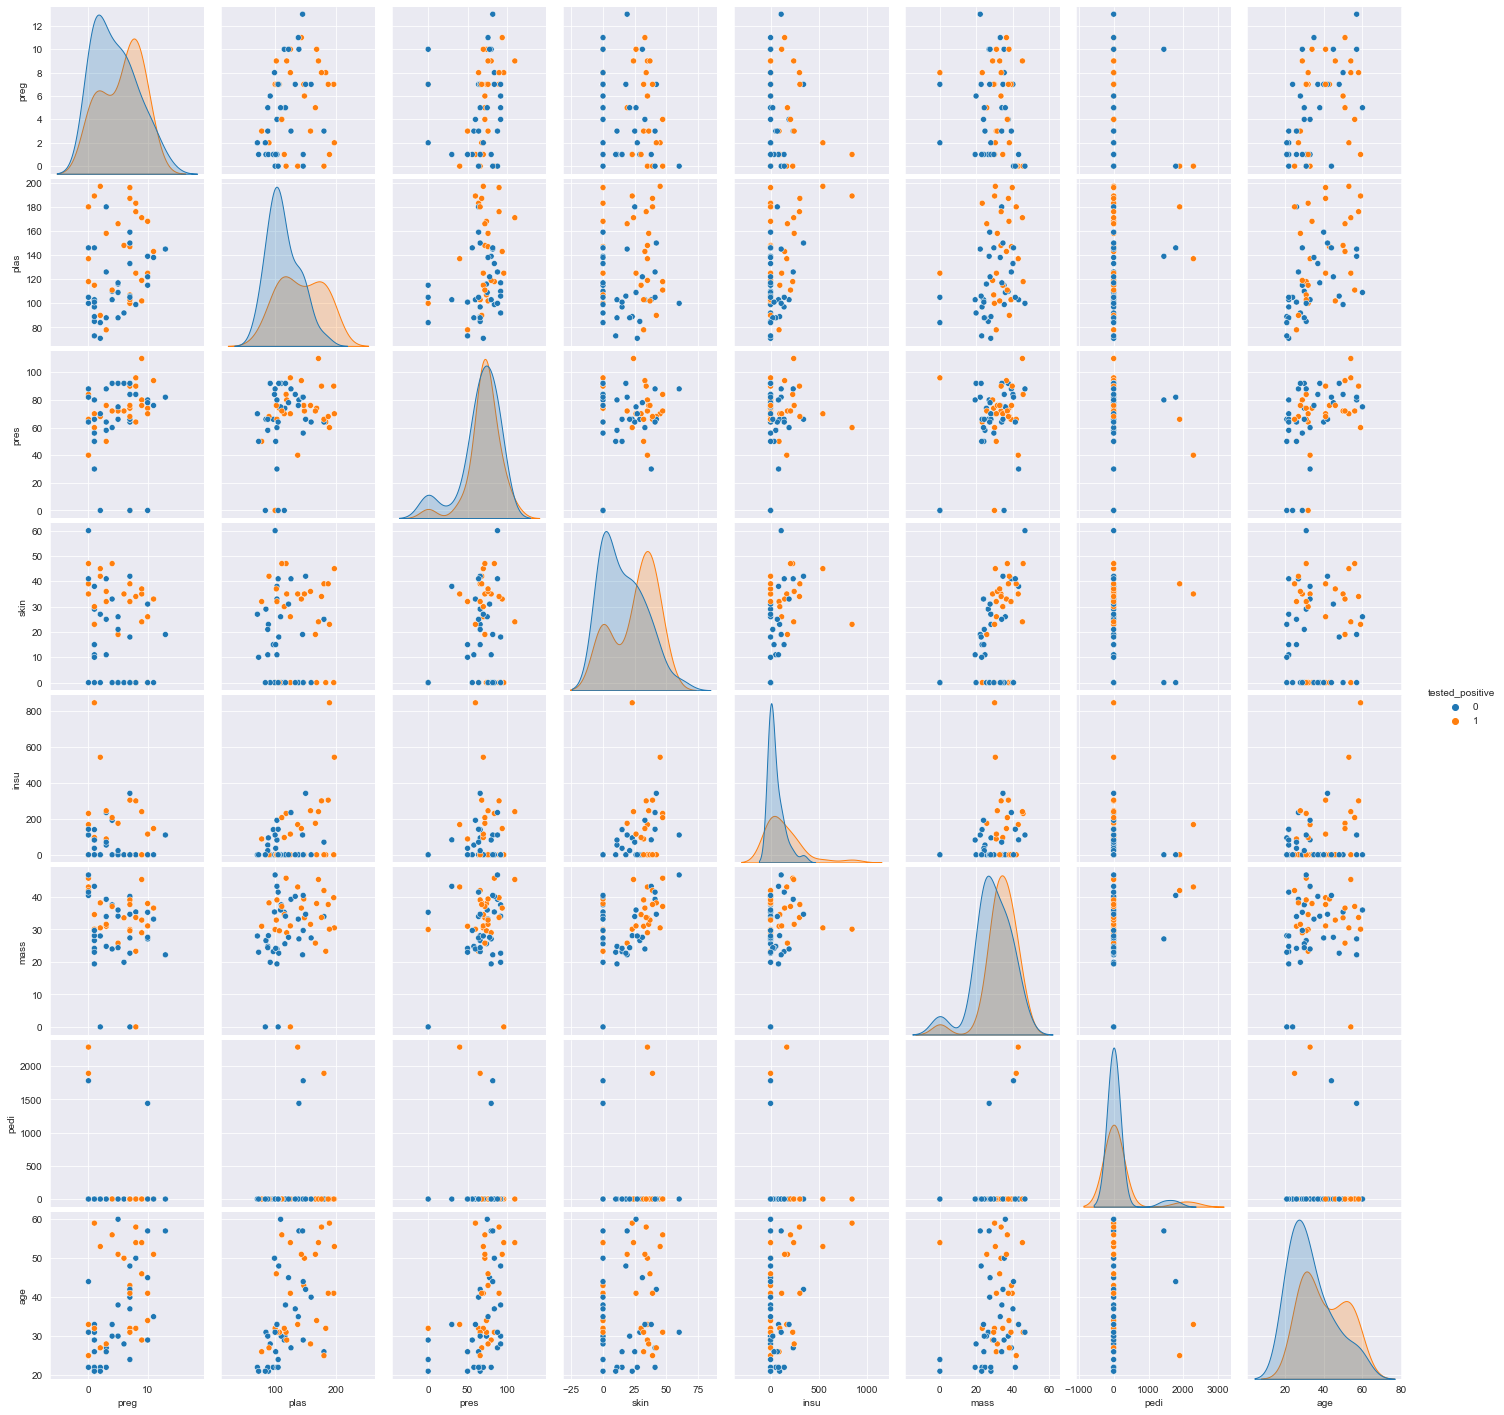

In [31]:
sns.set_style('darkgrid')
sns.pairplot(df, hue = 'tested_positive')

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('tested_positive',axis=1))

StandardScaler()

In [13]:
scaled_features = scaler.transform(df.drop('tested_positive',axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.292609,0.662613,0.164885,0.871822,-0.598837,0.269364,-0.260791,1.172243
1,-1.123990,-1.229231,-0.098643,0.520791,-0.598837,-0.445925,-0.261385,-0.468614
2,0.859248,1.713637,-0.186485,-1.175857,-0.598837,-0.783132,-0.260694,-0.382253
3,-1.123990,-1.109114,-0.098643,0.169761,0.035161,-0.292649,-0.261781,-1.332223
4,-1.407310,0.332291,-1.240596,0.871822,0.534265,1.240113,4.663401,-0.295892


In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['tested_positive'],
                                                    test_size=0.30, random_state = 101)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
prediction = knn.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,prediction))

[[8 1]
 [7 3]]


In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       0.75      0.30      0.43        10

    accuracy                           0.58        19
   macro avg       0.64      0.59      0.55        19
weighted avg       0.65      0.58      0.54        19



In [27]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

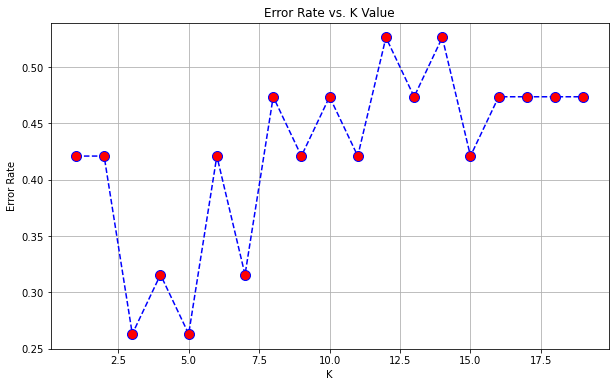

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[8 1]
 [4 6]]


              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.86      0.60      0.71        10

    accuracy                           0.74        19
   macro avg       0.76      0.74      0.73        19
weighted avg       0.77      0.74      0.73        19

